Classification Report:
               precision    recall  f1-score   support

        -1.0       0.83      0.88      0.85        40
         1.0       0.99      0.99      0.99       800

    accuracy                           0.99       840
   macro avg       0.91      0.93      0.92       840
weighted avg       0.99      0.99      0.99       840

Confusion Matrix:
 [[ 35   5]
 [  7 793]]


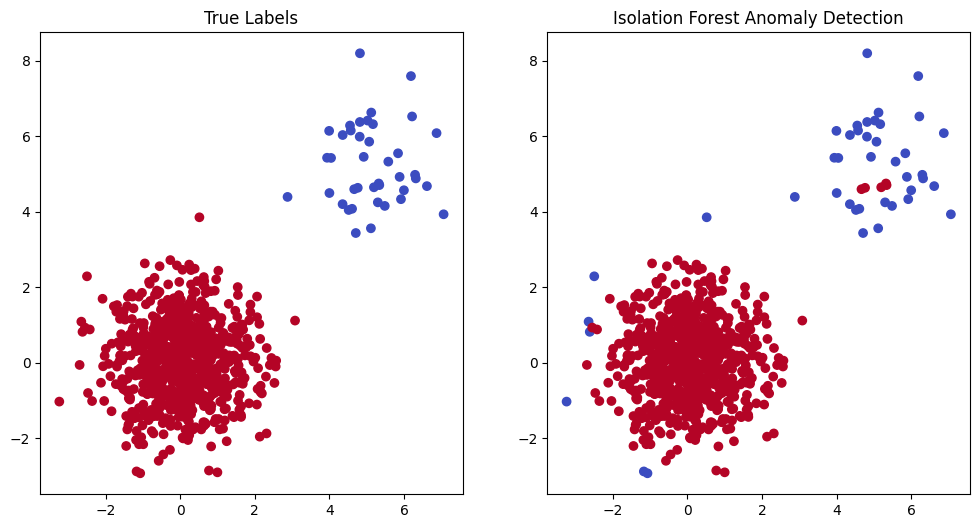

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)
normal_data = np.random.normal(0, 1, (800, 2))
outlier_data = np.random.normal(5, 1, (40, 2))
data = np.vstack((normal_data, outlier_data))

labels = np.ones(len(data))
labels[-len(outlier_data):] = -1

clf = IsolationForest(contamination=0.05, random_state=42)  # Adjust the contamination parameter as needed

clf.fit(data)

predictions = clf.predict(data)

print("Classification Report:\n", classification_report(labels, predictions))
print("Confusion Matrix:\n", confusion_matrix(labels, predictions))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.coolwarm)
plt.title("True Labels")

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap=plt.cm.coolwarm)
plt.title("Isolation Forest Anomaly Detection")

plt.show()
